In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Read Dataset
data = pd.read_csv("Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# No null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
# Dataset is balanced
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
# maping the sentiment positive as 1 and negative as 0
data['sentiment'] = data['sentiment'].map({'positive' : 1, 'negative' : 0})
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## Data Cleaning
###### 1. convert lower case
###### 2. Remove HTML tags
###### 3. Remove Punctuation
###### 4. Remove stopwords
###### 5. convert digit to word
###### 6. stemming

In [6]:
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [7]:
# Convert everything into lowercase
def to_lower(text):
    return text.lower()

In [8]:
data['review'] = data['review'].apply(to_lower)

In [9]:
# Remove HTML tags
import re
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

In [10]:
data['review'] = data['review'].apply(clean)

In [11]:
data['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [12]:
# Remove Punctuation
import string
def remove_puntuation(text):
    text_nopunct = ''.join([i for i in text if i not in string.punctuation])
    return text_nopunct

In [13]:
data['review'] = data['review'].apply(lambda x: remove_puntuation(x))

In [14]:
data.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [15]:
# Remove stopwords
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Biman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

data['review'] = data['review'].apply(remove_stopwords)
data['review'][0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'f

In [17]:
# convert digit to number
import inflect 
q = inflect.engine()

In [18]:
def convert_number(text):
    new_str = []
    for word in text:
        if word.isdigit(): 
            temp = q.number_to_words(word) 
            new_str.append(temp)
        else: 
            new_str.append(word)
    return new_str

In [19]:
data['review'] = data['review'].apply(convert_number)
data['review'][0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 'one',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 

In [20]:
# Stemming
from nltk.stem import PorterStemmer
def stem_txt(text):
    ps = PorterStemmer()
    return " ".join([ps.stem(w) for w in text])

data['review'] = data['review'].apply(stem_txt)
data['review'][0]

'one review mention watch one oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom

In [21]:
data.head()

,review,sentiment
0,one review mention watch one oz episod youll h...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


### Data Frequency check

In [22]:

a = data['review'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)


In [23]:
top_N = 2000
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

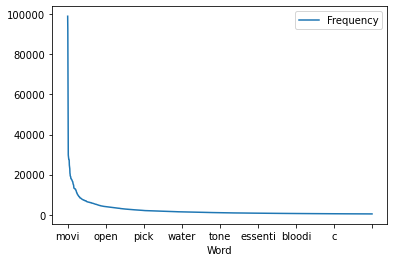

In [24]:
rslt.plot(x='Word',y='Frequency')

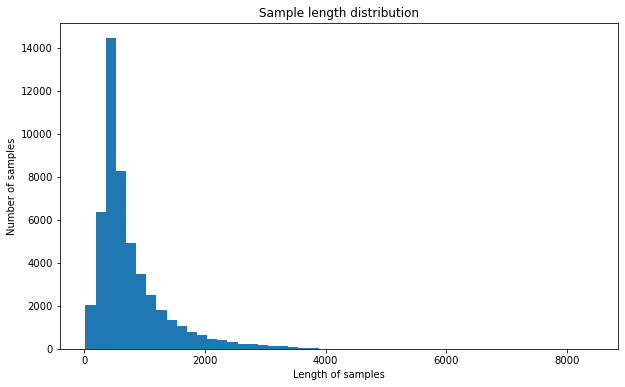

In [26]:
# Now, let's see the average number of words per sample
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(data['review'])], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

### Creating Bag of Words using Count vectorizer

In [27]:
X = data.iloc[:, 0].values
y = data.iloc[:, 1:].values

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(data.review).toarray()

In [30]:
X.shape, y.shape

((50000, 1000), (50000, 1))

### Train test Split

In [31]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=56)

### Creating Model

In [32]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [33]:
gau_nav = GaussianNB()
ber_nav = BernoulliNB(alpha=1.0,fit_prior=True)

In [34]:
gau_nav.fit(train_X, train_y)
ber_nav.fit(train_X, train_y)

C:\Users\Biman\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Biman\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BernoulliNB()

In [35]:
y_pred_g = gau_nav.predict(test_X)
y_pred_b = ber_nav.predict(test_X)

### Accurecy check

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [37]:
accuracy_score(test_y, y_pred_g)

0.7928

In [38]:
accuracy_score(test_y, y_pred_b)

0.8255

In [39]:
cm=confusion_matrix(test_y, y_pred_b)
cm

array([[3991,  966],
       [ 779, 4264]], dtype=int64)

In [40]:
print(classification_report(test_y, y_pred_b))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      4957
           1       0.82      0.85      0.83      5043

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



### dump the model

In [41]:
import pickle
pickle.dump(ber_nav,open('model.pkl','wb'))

In [42]:
word_dict = cv.vocabulary_
pickle.dump(word_dict,open('bow.pkl','wb'))

### Prediction

In [43]:
inp = """Terrible. Complete trash. Brainless tripe. Insulting to anyone who isn't an 8 year old fan boy. Im actually pretty disgusted that this movie is making the money it is - what does it say about the people who brainlessly hand over the hard earned cash to be 'entertained' in this fashion and then come here to leave a positive 8.8 review?? Oh yes, they are morons. Its the only sensible conclusion to draw. How anyone can rate this movie amongst the pantheon of great titles is beyond me.

So trying to find something constructive to say about this title is hard...I enjoyed Iron Man? Tony Stark is an inspirational character in his own movies but here he is a pale shadow of that...About the only 'hook' this movie had into me was wondering when and if Iron Man would knock Captain America out...Oh how I wished he had :( What were these other characters anyways? Useless, bickering idiots who really couldn't organise happy times in a brewery. The film was a chaotic mish mash of action elements and failed 'set pieces'...

I found the villain to be quite amusing.

And now I give up. This movie is not robbing any more of my time but I felt I ought to contribute to restoring"""

In [44]:
i1 = to_lower(inp)
i2 = clean(i1)
i3 = remove_puntuation(i2)
i4 = remove_stopwords(i3)
i5 = convert_number(i4)
i6 = stem_txt(i5)


In [45]:
i6

'terribl complet trash brainless tripe insult anyon isnt eight year old fan boy im actual pretti disgust movi make money say peopl brainlessli hand hard earn cash entertain fashion come leav posit eighty-eight review oh ye moron sensibl conclus draw anyon rate movi amongst pantheon great titl beyond tri find someth construct say titl hardi enjoy iron man toni stark inspir charact movi pale shadow thatabout hook movi wonder iron man would knock captain america outoh wish charact anyway useless bicker idiot realli couldnt organis happi time breweri film chaotic mish mash action element fail set piec found villain quit amus give movi rob time felt ought contribut restor'

In [46]:
bow = []

In [47]:
for word in word_tokenize(i6):
    bow.append(word_tokenize(i6).count(word))

In [48]:
cleaned_inp = []
for i in word_dict:
    cleaned_inp.append(i6.count(i[0]))


In [49]:
y_pred = ber_nav.predict(np.array(cleaned_inp).reshape(1,1000))

In [50]:
y_pred

array([0], dtype=int64)